In [24]:
# https://github.com/gregvw/FEniCS-examples/blob/master/advdiff.py

## Advection-diffusion equation

In [25]:
from dolfin import *

In [26]:
"""
    Solve the advection-diffusion equation u_t+adv*u_x=dif*u_xx on the interval [-1,1]
    for 0<=t<=T with the initial condition u(x,0)=u0(x) and homogeneous Neumann 
    conditions 
"""


# Number of elements
nel = 100

mesh = IntervalMesh(nel,-1,1)



In [27]:
V = FunctionSpace(mesh,"CG",1)
u = TrialFunction(V)
v = TestFunction(V)


In [28]:
# Initial Data
u0 = Expression('exp(-5*pow(x[0],2))', degree=2)

In [29]:

adv = Constant(1.0)
dif = Constant(1.0e-10)

# Time step
dt = Constant(0.1)

In [30]:
# Define variational problem
a = u*v*dx + dt*inner(grad(v),dif*grad(u))*dx + dt*inner(v,grad(adv*u)[0])*dx 


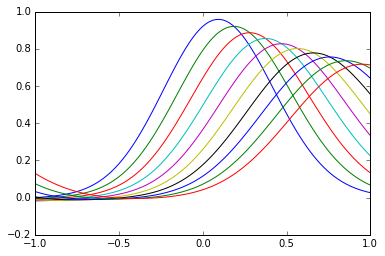

In [31]:

for k in range(10):
    L = v*u0*dx
    u = Function(V)
    solve(a == L,u)
    u0 = u
    plot(u)
#     interactive()